In [1]:
import json
import numpy as np
from random import choice
from keras_bert import load_trained_model_from_checkpoint, Tokenizer
import re, os
import codecs
import pandas as pd

Using TensorFlow backend.


# 載入Pre-trained Model

In [2]:
config_path = './cased_L-12_H-768_A-12/bert_config.json'
checkpoint_path = './cased_L-12_H-768_A-12/bert_model.ckpt'
dict_path = './cased_L-12_H-768_A-12/vocab.txt'

# vocabulary轉成tokenize工具

In [3]:
token_dict ={}

with codecs.open(dict_path, 'r') as reader:
    for line in reader:
        token = line.strip()
        token_dict[token] = len(token_dict)
        
tokenizer = Tokenizer(token_dict)

# CSV切割成(text,label)

In [4]:
df = pd.read_csv('data/bertInputTrainData.csv')

data = []
#text_len = 1024
text_len = len(df['sentence'])
for i in range(text_len):
    text = df['sentence'][i]
    label = df['background'][i]
    data.append((text,label))

# Text塞入padding
X為輸入的text list，text list的size是batch size

以batch為單位計算最長文本

In [5]:
def seq_padding(X, padding=0):
    L = [len(x) for x in X] #將所有text length輸入
    ML = max(L) #找到最長的作為標準
    return np.array([
        np.concatenate([x, [padding] * (ML - len(x))]) if len(x) < ML else x for x in X
    ])

# data_generator將資料轉換成Model輸入格式

In [6]:
class data_generator:
    def __init__(self, data, batch_size=32):
        self.data = data
        self.batch_size = batch_size
        self.steps = len(self.data) // self.batch_size

        if len(self.data) % self.batch_size != 0:
            self.steps += 1

    def __len__(self):
        return self.steps

    def __iter__(self):
        while True:
            idxs = list(range(len(self.data))) #每筆資料索引值
            #np.random.shuffle(idxs)
            X1, X2, Y = [], [], [] #X1為indices list、X2為segment list

            for i in idxs:
                d = self.data[i]
                text = d[0]
                x1, x2 = tokenizer.encode(first=text)
                y = d[1]

                X1.append(x1)
                X2.append(x2)
                Y.append([y])
                
                if(len(X1) == self.batch_size or i == idxs[-1]):
                    X1 = seq_padding(X1)
                    X2 = seq_padding(X2)
                    
                    yield [X1, X2], np.array(Y)
                    [X1, X2, Y] = [], [], []

# 主要模型(5-fold)
利用5折去交叉驗證模型

挑選分數最好的模型當作儲存模型





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







Tensor("input_1:0", shape=(?, ?), dtype=float32)
Tensor("input_2:0", shape=(?, ?), dtype=float32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5941 - f1: 0.0327 - val_loss: 0.5745 - val_f1: 0.0000e+00
Epoch 2/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5683 - f1: 0.0293 - val_loss: 0.5507 - val_f1: 0.0000e+00
Epoch 3/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5468 - f1: 0.0610 - val_loss: 0.5293 - val_f1: 0.0074
Epoch 4/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.5287 - f1: 0.0960 - val_loss: 0.5102 - val_f1: 0.0453
Epoch 5/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.5123 - f1: 0.1628 - val_loss: 0.4931 - val_f

1172/1172 [==============================] - 230s 196ms/step - loss: 0.3734 - f1: 0.6774 - val_loss: 0.3621 - val_f1: 0.7183
Epoch 32/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3729 - f1: 0.6787 - val_loss: 0.3610 - val_f1: 0.7182
Epoch 33/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3716 - f1: 0.6795 - val_loss: 0.3601 - val_f1: 0.7194
Epoch 34/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3702 - f1: 0.6813 - val_loss: 0.3592 - val_f1: 0.7207
Epoch 35/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.3692 - f1: 0.6839 - val_loss: 0.3582 - val_f1: 0.7208
Epoch 36/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3679 - f1: 0.6846 - val_loss: 0.3575 - val_f1: 0.7207
Epoch 37/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3670 - f1: 0.6835 - val_loss: 0.3568 - val_f1: 0.7220
Epoch 38/70
1172/1172 [==============================

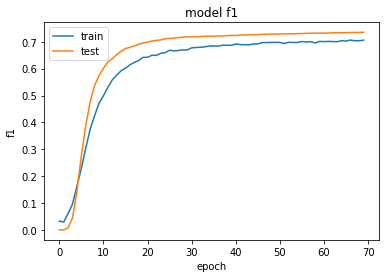

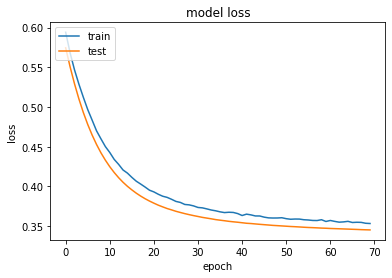

Tensor("input_3:0", shape=(?, ?), dtype=float32)
Tensor("input_4:0", shape=(?, ?), dtype=float32)
Epoch 1/70
1172/1172 [==============================] - 235s 201ms/step - loss: 0.8277 - f1: 0.3537 - val_loss: 0.6443 - val_f1: 0.0646
Epoch 2/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.6121 - f1: 0.0313 - val_loss: 0.5904 - val_f1: 0.0037
Epoch 3/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.5819 - f1: 0.0062 - val_loss: 0.5684 - val_f1: 0.0020
Epoch 4/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.5608 - f1: 0.0099 - val_loss: 0.5461 - val_f1: 0.0064
Epoch 5/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.5403 - f1: 0.0284 - val_loss: 0.5252 - val_f1: 0.0184
Epoch 6/70
1172/1172 [==============================] - 229s 196ms/step - loss: 0.5218 - f1: 0.0663 - val_loss: 0.5063 - val_f1: 0.0698
Epoch 7/70
1172/1172 [==============================] - 229s 195ms/step - loss: 0.5050

1172/1172 [==============================] - 230s 196ms/step - loss: 0.3555 - f1: 0.7047 - val_loss: 0.3469 - val_f1: 0.7383
Epoch 61/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.3557 - f1: 0.7023 - val_loss: 0.3467 - val_f1: 0.7384
Epoch 62/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.3547 - f1: 0.7018 - val_loss: 0.3465 - val_f1: 0.7378
Epoch 63/70
1172/1172 [==============================] - 229s 195ms/step - loss: 0.3541 - f1: 0.7024 - val_loss: 0.3463 - val_f1: 0.7378
Epoch 64/70
1172/1172 [==============================] - 228s 195ms/step - loss: 0.3547 - f1: 0.7029 - val_loss: 0.3461 - val_f1: 0.7385
Epoch 65/70
1172/1172 [==============================] - 229s 195ms/step - loss: 0.3535 - f1: 0.7066 - val_loss: 0.3459 - val_f1: 0.7383
Epoch 66/70
1172/1172 [==============================] - 228s 195ms/step - loss: 0.3538 - f1: 0.7032 - val_loss: 0.3457 - val_f1: 0.7392
Epoch 67/70
1172/1172 [==============================

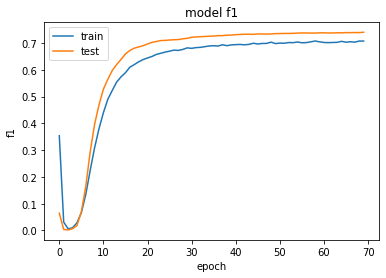

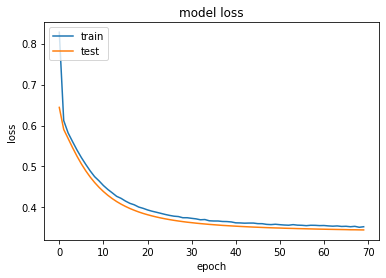

Tensor("input_5:0", shape=(?, ?), dtype=float32)
Tensor("input_6:0", shape=(?, ?), dtype=float32)
Epoch 1/70
1172/1172 [==============================] - 237s 202ms/step - loss: 0.7268 - f1: 0.3014 - val_loss: 0.6006 - val_f1: 0.0175
Epoch 2/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5894 - f1: 0.0247 - val_loss: 0.5658 - val_f1: 0.0021
Epoch 3/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.5654 - f1: 0.0163 - val_loss: 0.5436 - val_f1: 0.0048
Epoch 4/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.5456 - f1: 0.0349 - val_loss: 0.5223 - val_f1: 0.0211
Epoch 5/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.5267 - f1: 0.0742 - val_loss: 0.5028 - val_f1: 0.0667
Epoch 6/70
1172/1172 [==============================] - 229s 195ms/step - loss: 0.5081 - f1: 0.1413 - val_loss: 0.4853 - val_f1: 0.1451
Epoch 7/70
1172/1172 [==============================] - 229s 195ms/step - loss: 0.4931

1172/1172 [==============================] - 230s 197ms/step - loss: 0.3556 - f1: 0.7056 - val_loss: 0.3432 - val_f1: 0.7363
Epoch 61/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3556 - f1: 0.7041 - val_loss: 0.3428 - val_f1: 0.7362
Epoch 62/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3561 - f1: 0.7050 - val_loss: 0.3427 - val_f1: 0.7365
Epoch 63/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.3543 - f1: 0.7095 - val_loss: 0.3424 - val_f1: 0.7363
Epoch 64/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3550 - f1: 0.7094 - val_loss: 0.3422 - val_f1: 0.7369
Epoch 65/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3543 - f1: 0.7072 - val_loss: 0.3421 - val_f1: 0.7378
Epoch 66/70
1172/1172 [==============================] - 229s 195ms/step - loss: 0.3548 - f1: 0.7075 - val_loss: 0.3419 - val_f1: 0.7378
Epoch 67/70
1172/1172 [==============================

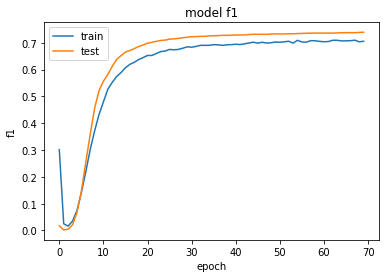

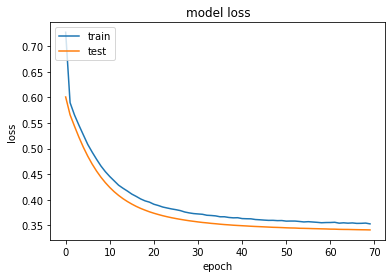

Tensor("input_7:0", shape=(?, ?), dtype=float32)
Tensor("input_8:0", shape=(?, ?), dtype=float32)
Epoch 1/70
1172/1172 [==============================] - 239s 204ms/step - loss: 0.5761 - f1: 0.0512 - val_loss: 0.5437 - val_f1: 0.0000e+00
Epoch 2/70
1172/1172 [==============================] - 233s 198ms/step - loss: 0.5495 - f1: 0.0224 - val_loss: 0.5220 - val_f1: 5.6907e-04
Epoch 3/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5288 - f1: 0.0539 - val_loss: 0.5026 - val_f1: 0.0243
Epoch 4/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5109 - f1: 0.1243 - val_loss: 0.4853 - val_f1: 0.1149
Epoch 5/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.4956 - f1: 0.2020 - val_loss: 0.4700 - val_f1: 0.2698
Epoch 6/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.4818 - f1: 0.2903 - val_loss: 0.4564 - val_f1: 0.3930
Epoch 7/70
1172/1172 [==============================] - 233s 198ms/step - loss

1172/1172 [==============================] - 232s 198ms/step - loss: 0.3564 - f1: 0.7055 - val_loss: 0.3397 - val_f1: 0.7322
Epoch 61/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.3566 - f1: 0.7041 - val_loss: 0.3395 - val_f1: 0.7324
Epoch 62/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3549 - f1: 0.7067 - val_loss: 0.3392 - val_f1: 0.7324
Epoch 63/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3556 - f1: 0.7057 - val_loss: 0.3390 - val_f1: 0.7329
Epoch 64/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3564 - f1: 0.7046 - val_loss: 0.3388 - val_f1: 0.7331
Epoch 65/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.3551 - f1: 0.7053 - val_loss: 0.3385 - val_f1: 0.7334
Epoch 66/70
1172/1172 [==============================] - 231s 198ms/step - loss: 0.3554 - f1: 0.7055 - val_loss: 0.3383 - val_f1: 0.7333
Epoch 67/70
1172/1172 [==============================

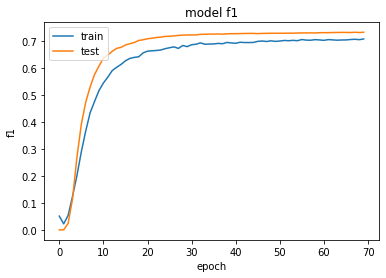

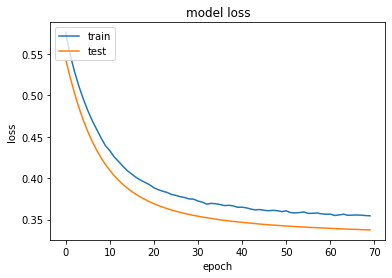

Tensor("input_9:0", shape=(?, ?), dtype=float32)
Tensor("input_10:0", shape=(?, ?), dtype=float32)
Epoch 1/70
1172/1172 [==============================] - 239s 204ms/step - loss: 0.6585 - f1: 0.2810 - val_loss: 0.5741 - val_f1: 0.0108
Epoch 2/70
1172/1172 [==============================] - 234s 200ms/step - loss: 0.5685 - f1: 0.0366 - val_loss: 0.5491 - val_f1: 0.0085
Epoch 3/70
1172/1172 [==============================] - 233s 199ms/step - loss: 0.5468 - f1: 0.0527 - val_loss: 0.5292 - val_f1: 0.0370
Epoch 4/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5272 - f1: 0.1024 - val_loss: 0.5109 - val_f1: 0.1182
Epoch 5/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.5099 - f1: 0.1703 - val_loss: 0.4944 - val_f1: 0.2196
Epoch 6/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.4939 - f1: 0.2509 - val_loss: 0.4798 - val_f1: 0.3287
Epoch 7/70
1172/1172 [==============================] - 230s 197ms/step - loss: 0.481

1172/1172 [==============================] - 231s 197ms/step - loss: 0.3553 - f1: 0.7043 - val_loss: 0.3573 - val_f1: 0.7221
Epoch 61/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3544 - f1: 0.7065 - val_loss: 0.3570 - val_f1: 0.7219
Epoch 62/70
1172/1172 [==============================] - 232s 198ms/step - loss: 0.3532 - f1: 0.7058 - val_loss: 0.3568 - val_f1: 0.7222
Epoch 63/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3547 - f1: 0.7052 - val_loss: 0.3565 - val_f1: 0.7219
Epoch 64/70
1172/1172 [==============================] - 231s 197ms/step - loss: 0.3534 - f1: 0.7082 - val_loss: 0.3563 - val_f1: 0.7229
Epoch 65/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3530 - f1: 0.7066 - val_loss: 0.3561 - val_f1: 0.7230
Epoch 66/70
1172/1172 [==============================] - 230s 196ms/step - loss: 0.3523 - f1: 0.7104 - val_loss: 0.3559 - val_f1: 0.7240
Epoch 67/70
1172/1172 [==============================

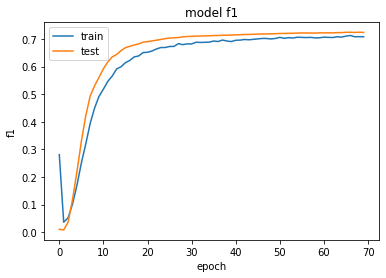

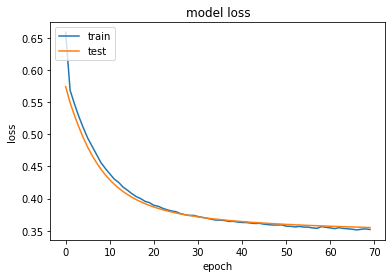

In [7]:
from keras.layers import *
from keras.models import Model
import keras.backend as K
from keras.optimizers import Adam
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

kf = KFold(n_splits=5, shuffle=True, random_state=None)

allEpoch_max_valF1 = [] #儲存每次cv之val_f1最高
k = 0 #cv次數
for train_index, valid_index in kf.split(data):
    
    train_data = [data[i] for i in train_index]
    valid_data = [data[i] for i in valid_index]

    bert_model = load_trained_model_from_checkpoint(config_path, checkpoint_path, seq_len=None)

    for l in bert_model.layers:
        l.trainable = False #false


    x1_in = Input(shape=(None,))
    x2_in = Input(shape=(None,))
    print(x1_in)
    print(x2_in)

    x = bert_model([x1_in, x2_in])
    x = Lambda(lambda x: x[:, 0])(x)
    p = Dense(1, activation='sigmoid')(x)


    model = Model([x1_in, x2_in], p)
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(1e-5),
        metrics=['f1']
    )
    #model.summary()

    train_D = data_generator(train_data)
    valid_D = data_generator(valid_data)

    history = model.fit_generator(
        train_D.__iter__(),
        steps_per_epoch=len(train_D),
        epochs=70,
        validation_data=valid_D.__iter__(),
        validation_steps=len(valid_D)
    )
    
    k += 1
    print(" ")
    print("=====================這是第",k,"次cv=====================")
    
    
    allEpoch_max_valF1.append(max(history.history['val_f1'])) #儲存每個cv中epoch val_fi分數最高的那個
    
    #print("f1:", history.history['f1'])
    #print("val_f1:", history.history['val_f1'])
    plt.plot(history.history['f1'])
    plt.plot(history.history['val_f1'])
    plt.title('model f1')
    plt.ylabel('f1')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    #print("loss:", history.history['loss'])
    #print("val_loss:", history.history['val_loss'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

model.save('model/background_model.h5')

In [8]:
print(allEpoch_max_valF1)

[0.7353428127950581, 0.7405411536704767, 0.7394920397252543, 0.7339482905770081, 0.7242425662352904]
